In [24]:
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as f
import torch
import numpy as np
import os
import sys
import torch
from torchvision import transforms, datasets
import torch.optim as optim
import matplotlib.pyplot as plt
from CovLstm_cell_simply_nocuda import ConvLSTMCell as Covlstm_cell
import time
from BMSELoss import BMSELoss
import scipy

In [25]:
############# load data ################
from matplotlib.image import imread
import matplotlib.image as mpimg
from skimage import color
from scipy import ndimage, misc
import cloudy
def load_images(image_paths):
    # Load the images from disk.
    images = [color.rgb2gray(imread(path)) for path in image_paths]
    #images = [(imread(path)) for path in image_paths]
    # Convert to a numpy array and return it.
    return np.asarray((images), dtype=np.float32)


train_dir = cloudy.image_paths_train
dir_day = sorted(train_dir)

In [26]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        #input_size_c = 1 hidden_size = h
        #self.conv_act = conv2_act()
        self.rnn1_1 = Covlstm_cell(1,1)
        self.rnn1_2 = Covlstm_cell(1,1)
        self.rnn1_3 = Covlstm_cell(1,1)
        self.rnn2_1 = Covlstm_cell(1,1)
        #self.rnn2_2 = Covlstm_cell(1,1)
       #self.rnn2_3 = Covlstm_cell(1,1)
        #self.rnn3_1 = Covlstm_cell(1,1)
        #self.rnn3_2 = Covlstm_cell(1,1)
        #self.rnn3_3 = Covlstm_cell(1,1)
        #self.downsmaple1 =  downsmaple() 
        #self.downsmaple2 =  downsmaple() 
    def init_hiden(self):
        hidden = []
        hidden1_1 = None
        hidden1_2 = None
        hidden1_3 = None
        
        hidden2_1 = None
        #hidden2_2 = None
       #hidden2_3 = None
        
        #hidden3_1 = None
        #hidden3_2 = None
        #hidden3_3 = None
        hidden.append(hidden1_1)
        hidden.append(hidden1_2)
        hidden.append(hidden1_3)
        hidden.append(hidden2_1)
        #hidden.append(hidden2_2)
       #hidden.append(hidden2_3)
        #hidden.append(hidden3_1)
        #hidden.append(hidden3_2)
        #hidden.append(hidden3_3)
        return hidden
        
    def forward(self,data,hidden):
        hidden1_1 = hidden[0]
        hidden1_2 = hidden[1]
        hidden1_3 = hidden[2]
        
        hidden2_1 = hidden[3] 
        #hidden2_2 = hidden[4]
      # hidden2_3 = hidden[5] 
        
        #hidden3_1 = hidden[6]  
        #hidden3_2 = hidden[7]  
        #hidden3_3 = hidden[8]
        #data = self.conv_act(data)
        hidden1_1 = self.rnn1_1.forward(data ,hidden1_1)
                
        hidden1_2_input = hidden1_1[0][0]
        hidden1_2_input = hidden1_2_input[:,None,:,:] 
        hidden1_2 = self.rnn1_2.forward(hidden1_2_input,hidden1_2)
        
        hidden1_3_input = hidden1_2[0][0]
        hidden1_3_input = hidden1_3_input[:,None,:,:] 
        hidden1_3 = self.rnn1_3.forward(hidden1_3_input,hidden1_3)
        
        hidden2_1_input = hidden1_3[0][0]
        hidden2_1_input = hidden2_1_input[:,None,:,:] 
        #hidden2_1_input  = self.downsmaple1(hidden2_1_input)
        hidden2_1 = self.rnn2_1.forward(hidden2_1_input ,hidden2_1)
        '''
        hidden2_2_input = hidden2_1[0][0]
        hidden2_2_input = hidden2_2_input[:,None,:,:] 
        hidden2_2 = self.rnn2_2.forward(hidden2_2_input,hidden2_2)
        
        hidden2_3_input = hidden2_2[0][0]
        hidden2_3_input = hidden2_3_input[:,None,:,:] 
        hidden2_3 = self.rnn2_3.forward(hidden2_3_input,hidden2_3)
        
        hidden3_1_input = hidden2_2[0][0]
        hidden3_1_input = hidden3_1_input[:,None,:,:]  
        #hidden3_1_input = self.downsmaple2(hidden3_1_input)
        hidden3_1 = self.rnn3_1.forward(hidden3_1_input ,hidden3_1)
            
        hidden3_2_input = hidden3_1[0][0]
        hidden3_2_input = hidden3_2_input[:,None,:,:] 
        hidden3_2 = self.rnn3_2.forward(hidden3_2_input,hidden3_2)
            
        hidden3_3_input = hidden3_2[0][0]
        hidden3_3_input = hidden3_3_input[:,None,:,:] 
        hidden3_3 = self.rnn3_3.forward(hidden3_3_input,hidden3_3)'''
        #encoder_out = hidden3_3[0][0][0]
        #encoder_out = hidden3_3[0]
        encoder_out = hidden2_1[0]
        hidden = []
        hidden.append(hidden1_1)
        hidden.append(hidden1_2)
        hidden.append(hidden1_3)
        hidden.append(hidden2_1)
        #hidden.append(hidden2_2)
       #hidden.append(hidden2_3)
        #hidden.append(hidden3_1)
        #hidden.append(hidden3_2)
        #hidden.append(hidden3_3)
        '''for i in range(0,9):
            hidden_encoder.append(hidden1_1,hidden1_2,hidden1_3,
                                 hidden2_1,hidden2_2,hidden2_3,
                                 hidden3_1,hidden3_2,hidden3_3)'''
        # Dont care about hidden states
        return encoder_out,hidden
    
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        #input_size_c = 1 hidden_size = h
        num_c = [1, 1, 1]
        h = [1,1,1]
        #self.conv_act = conv2_act()
        self.rnn1_1 = Covlstm_cell(1,1)
        self.rnn1_2 = Covlstm_cell(1,1)
        self.rnn1_3 = Covlstm_cell(1,1)
        self.rnn2_1 = Covlstm_cell(1,1)
        #self.rnn2_2 = Covlstm_cell(1,1)
        #elf.rnn2_3 = Covlstm_cell(1,1)
        #self.rnn3_1 = Covlstm_cell(1,1)
        #self.rnn3_2 = Covlstm_cell(1,1)
        #self.rnn3_3 = Covlstm_cell(1,1)
        #self.upsmaple1 =  upsmaple() 
        #self.upsmaple2 =  upsmaple() 
        #self.deconv1 = deconv2_act()
        # self.deconv2 = deconv2_act(inplanes=8, out_channels=8, kernel_size=4, stride=2, padding=1)
        #self.conv_final = conv2_act()
        #self.conv_final = conv2_act()

        #self.conv_pre = conv2_act()
    '''def set_h0(self,encoder):
        self.rnn1_1_h = encoder.rnn3_3_h
        self.rnn1_2_h = encoder.rnn3_2_h
        self.rnn1_3_h = encoder.rnn3_1_h
        self.rnn2_1_h = encoder.rnn2_3_h
        self.rnn2_2_h = encoder.rnn2_2_h
        self.rnn2_3_h = encoder.rnn2_1_h
        self.rnn3_1_h = encoder.rnn1_2_h
        self.rnn3_2_h = encoder.rnn1_1_h'''
    
    '''def init_h0(self,hidden_en):
        self.hidden1_1 = hidden_en[8]
        self.hidden1_2 = hidden_en[7]
        self.hidden1_3 = hidden_en[6]
        
        self.hidden2_1 = hidden_en[5]
        self.hidden2_2 = hidden_en[4]
        self.hidden2_3 = hidden_en[3]
        
        self.hidden3_1 = hidden_en[2]
        self.hidden3_2 = hidden_en[1]
        self.hidden3_3 = hidden_en[0]'''
        
    def forward(self,data,hidden_en):
        #print('-----data size------')
        #print(data.size())
        #data = self.conv_act(data)
        hidden1_1 = hidden_en[3]
        hidden1_2 = hidden_en[2]
        hidden1_3 = hidden_en[1]
        
        hidden2_1 = hidden_en[0]
        #hidden2_2 = hidden_en[1]
        #idden2_3 = hidden_en[0]
        
        #hidden3_1 = hidden_en[2]
        #hidden3_2 = hidden_en[1]
        #hidden3_3 = hidden_en[0]
        
        
        hidden1_1 = self.rnn1_1.forward(data,hidden1_1)
                
        hidden1_2_input = hidden1_1[0][0]
        hidden1_2_input = hidden1_2_input[:,None,:,:] 
        hidden1_2 = self.rnn1_2.forward(hidden1_2_input,hidden1_2)
        
        hidden1_3_input = hidden1_2[0][0]
        hidden1_3_input = hidden1_3_input[:,None,:,:] 
        #hidden1_3_input = self.upsmaple1(hidden1_3_input)
        hidden1_3 = self.rnn1_3.forward(hidden1_3_input,hidden1_3)
       
        hidden2_1_input = hidden1_3[0][0]
        hidden2_1_input = hidden2_1_input[:,None,:,:] 
        hidden2_1 = self.rnn2_1.forward(hidden2_1_input ,hidden2_1)
        ''' 
        hidden2_2_input = hidden2_1[0][0]
        hidden2_2_input = hidden2_2_input[:,None,:,:] 
        hidden2_2 = self.rnn2_2.forward(hidden2_2_input,hidden2_2)
        
        hidden2_3_input = hidden2_2[0][0]
        hidden2_3_input = hidden2_3_input[:,None,:,:] 
        hidden2_3 = self.rnn2_3.forward(hidden2_3_input,hidden2_3)
       
        hidden3_1_input = hidden2_3[0][0]
        hidden3_1_input = hidden3_1_input[:,None,:,:]  
        #hidden3_1_input = self.upsmaple2(hidden3_1_input)
        hidden3_1 = self.rnn3_1.forward(hidden3_1_input ,hidden3_1)
            
        hidden3_2_input = hidden3_1[0][0]
        hidden3_2_input = hidden3_2_input[:,None,:,:] 
        hidden3_2 = self.rnn3_2.forward(hidden3_2_input,hidden3_2)
            
        hidden3_3_input = hidden3_2[0][0]
        hidden3_3_input = hidden3_3_input[:,None,:,:] 
        hidden3_3 = self.rnn3_3.forward(hidden3_3_input,hidden3_3)'''
        out = hidden2_1[0]
        #print('-----out data size------')
        #print(out.size())
        
        #out = self.deconv1(out)
        #print('-----out data size------')
        #print(out.size())
        #out = self.conv_final(out)
        #out = self.conv_pre(out)
        # Dont care about hidden states
        hidden = []
        hidden.append(hidden1_1)
        hidden.append(hidden1_2)
        hidden.append(hidden1_3)
        hidden.append(hidden2_1)
        #hidden.append(hidden2_2)
       #hidden.append(hidden2_3)
        return out,hidden

In [27]:
class TraModel(nn.Module):
    def __init__(self):
        super().__init__()
        #input_size_c = 1 hidden_size = h
        self.enc  = Encoder()
        self.dec  = Decoder()
        
    def forward(self,data,epoch):
        hidden_en = self.enc.init_hiden()
        T_en = 9 # same seq
        T_en = T_en+epoch
        for t in range(epoch, T_en):
            enc_output,hidden_en = self.enc(data[t],hidden_en)
        #self.dec.init_h0(hidden_en)
        dec_output = enc_output

        for t in range(epoch, T_en):
            dec_output,hidden_en= self.dec(dec_output,hidden_en)
        dec_output = dec_output[0][0]
        return dec_output

In [28]:
model = TraModel()
dic_param = torch.load('model/model8_10seq_10000dataset.pt',lambda s,_:s)
model.load_state_dict(dic_param)

C:\Users\tanintem\Desktop\deepsky real time updater\CovLstm_cell_simply_nocuda.py:14: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  torch.nn.init.xavier_normal(self.Gates.weight)
C:\Users\tanintem\Desktop\deepsky real time updater\CovLstm_cell_simply_nocuda.py:15: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  torch.nn.init.constant(self.Gates.bias, 0)


In [29]:
dic_param


OrderedDict([('enc.rnn1_1.Gates.weight', tensor([[[[-0.0782,  0.0794, -0.0716],
                        [ 0.1205,  0.1209,  0.2695],
                        [-0.0330,  0.1305, -0.0156]],
              
                       [[-0.0408,  0.0338,  0.0359],
                        [-0.1166,  0.3647, -0.4417],
                        [-0.0632,  0.3111,  0.0887]]],
              
              
                      [[[ 0.1132,  0.0345,  0.4336],
                        [-0.1459,  0.1837,  0.2158],
                        [ 0.0370, -0.1417,  0.1265]],
              
                       [[ 0.0057, -0.0412, -0.0752],
                        [-0.0065,  0.0066, -0.2366],
                        [-0.3041, -0.2084, -0.3177]]],
              
              
                      [[[ 0.1129, -0.3125,  0.1403],
                        [ 0.1471,  0.3082,  0.1176],
                        [ 0.0758, -0.0846,  0.0269]],
              
                       [[-0.2251,  0.2249, -0.2233],
             

# function for predict 3hr

In [33]:
def prediction(model,train_dir):
    seq = 9
    train_data = load_images(train_dir)
    Nx_input = torch.from_numpy(train_data)
    torch.manual_seed(0)
    x_input = Nx_input[:]/255
    x_input = x_input[:,None,None,:,:]
    x_input = Variable(x_input)

    epoch=0
    T_en = 9
    #T_en = T_en+epoch
    output = model(x_input,epoch)
    img = output.cpu() 
    img = img.data.numpy()
    #img.shape
    img = img*255
    image_name = "prediction_3hr/"+train_dir[-1][-16:] 
    print(image_name)
    scipy.misc.imsave(image_name, img)
    return img

In [34]:
############# load data ################
from matplotlib.image import imread
import matplotlib.image as mpimg
from skimage import color
from scipy import ndimage, misc
import cloudy
def load_images(image_paths):
    # Load the images from disk.
    images = [color.rgb2gray(imread(path)) for path in image_paths]
    
    # Convert to a numpy array and return it.
    return np.asarray((images), dtype=np.float32)
current = cloudy.get_data_dir('input')

In [35]:
    img = prediction(model,current[-20:])

prediction_3hr/se1_b08_2350.jpg


c:\users\tanintem\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


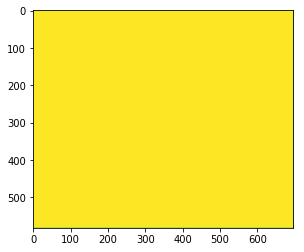